# Predicting tags frequency by time

## Getting the data

In [1]:
import sys
import warnings
from tqdm import tqdm

import csv
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
names = ['id', 'date', 'tags', 'likes']
dtypes = {'id': 'int', 'date': 'str', 'col3': 'str', 'likes': 'int'}
df = pd.read_csv('data.csv', header=None, sep='\t', names=names, dtype=dtypes, parse_dates=['date'])

In [3]:
df.head()

,id,date,tags,likes
0,2,2009-09-10,women sellers,0
1,4,2009-09-15,advert,0
2,5,2009-09-15,insurers mail,0
3,6,2009-10-06,mail,828
4,8,2009-10-06,byphone secretaries,1127


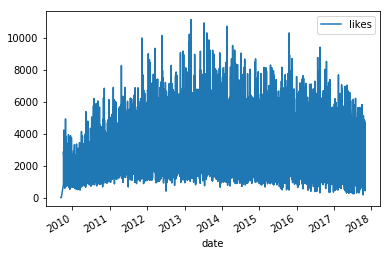

In [4]:
df.plot(x='date', y='likes')

## Transform the data 
Add a column for each tag

In [5]:
all_tags = list(set(tag for tags in df['tags'] for tag in tags.split()))
columns = ['id', 'date', 'likes'] + sorted(all_tags)

In [6]:
df_tags = pd.DataFrame(columns=columns)

In [7]:
for index, row in tqdm(df.iterrows()):
    df_tags.loc[index] = [row['id'], row['date'], row['likes']] + [0] * len(all_tags)
    for tag in row['tags'].split():
        df_tags.at[index, tag] = 1
#     if index > 10:
#         break

23558it [12:49, 30.60it/s]


In [38]:
df_tags.head()

,id,date,likes,advert,animals,art,banks,beauty,books,boss,...,service,sport,state,sun-technic,supermarket,support,tourism,transport,weather,women
0,2,2009-09-10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4,2009-09-15,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,2009-09-15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,2009-10-06,828,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,2009-10-06,1127,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
tags_sorted = []
for tag in all_tags:
    tags_sorted.append((tag, df_tags[tag].sum()))
    
tags_sorted.sort(key=lambda x: x[1])

print(tags_sorted[-15:])

tags_frequent = [tag[0] for tag in tags_sorted[-15:]]

[('food', 1017), ('colleagues', 1108), ('state', 1149), ('buyers', 1208), ('sellers', 1260), ('relatives', 1319), ('kids', 1440), ('leisure', 1441), ('education', 1465), ('healthcare', 1520), ('internet', 1524), ('friends', 1547), ('men', 1576), ('transport', 2068), ('women', 2806)]


### Plot all tags by time

/usr/lib/python3.6/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


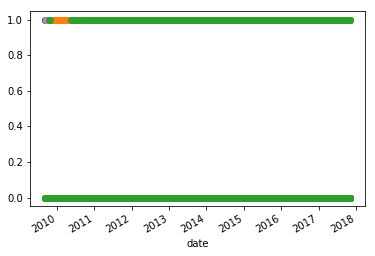

In [26]:
df_tags.plot(x='date', y=all_tags, style='o', legend=False)

In [60]:
def plotMovingAverage(series, n):

    """
    series - dataframe with timeseries
    n - rolling window size 

    """

    rolling_mean = series.rolling(window=n).sum()
    
    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(n))

    # При желании, можно строить и доверительные интервалы для сглаженных значений
    #rolling_std =  series.rolling(window=n).std()
    #upper_bond = rolling_mean+1.96*rolling_std
    #lower_bond = rolling_mean-1.96*rolling_std

    #plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
    #plt.plot(lower_bond, "r--")
    #plt.plot(series[n:], label="Actual values")
    
    plt.plot(rolling_mean, 'o')
    
    plt.legend(loc="upper left")
    plt.grid(True)

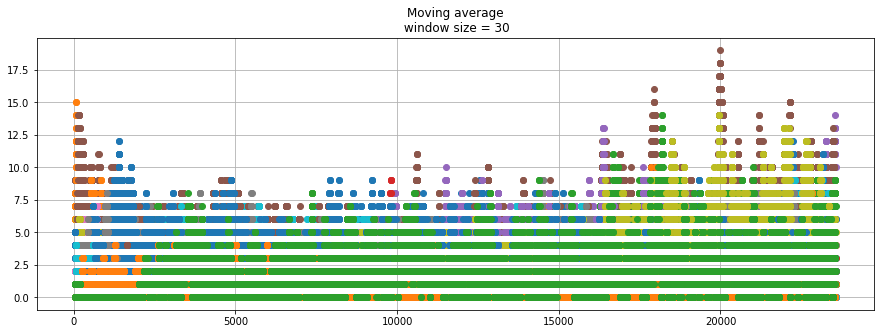

In [52]:
plotMovingAverage(df_tags[all_tags], 30)

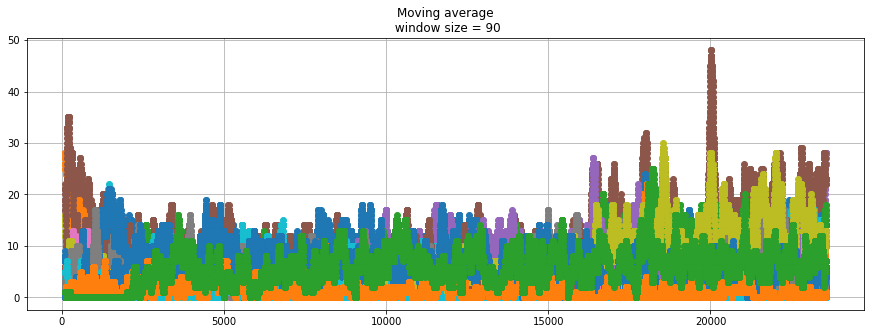

In [51]:
plotMovingAverage(df_tags[all_tags], 90)

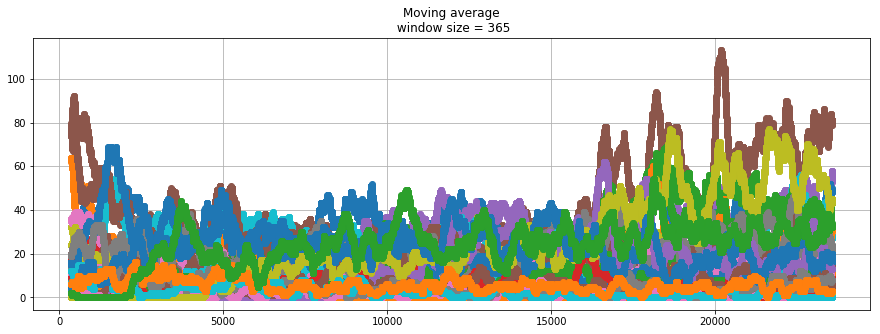

In [37]:
plotMovingAverage(df_tags[all_tags], 365)

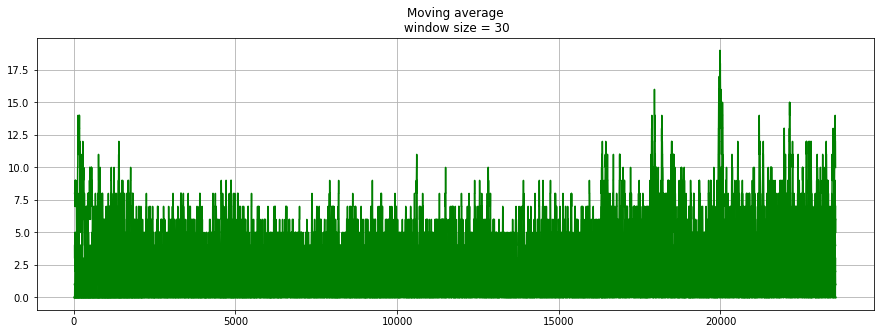

In [57]:
plotMovingAverage(df_tags[tags_frequent], 30)

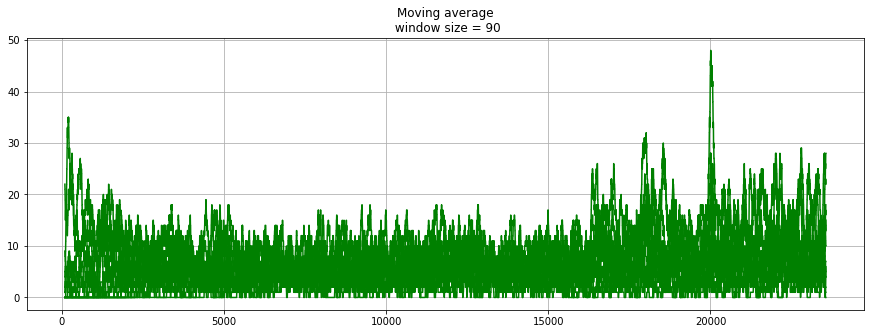

In [58]:
plotMovingAverage(df_tags[tags_frequent], 90)

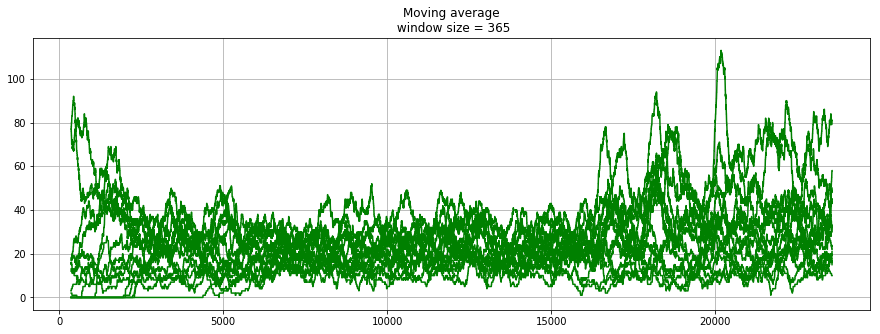

In [59]:
plotMovingAverage(df_tags[tags_frequent], 365)

In [15]:
df_tags['mon'] = df_tags['date'].month
df_tags_monsum = df_tags.groupby('mon').aggregate(sum)


AttributeError: 'Series' object has no attribute 'month'

## Smoothing likes

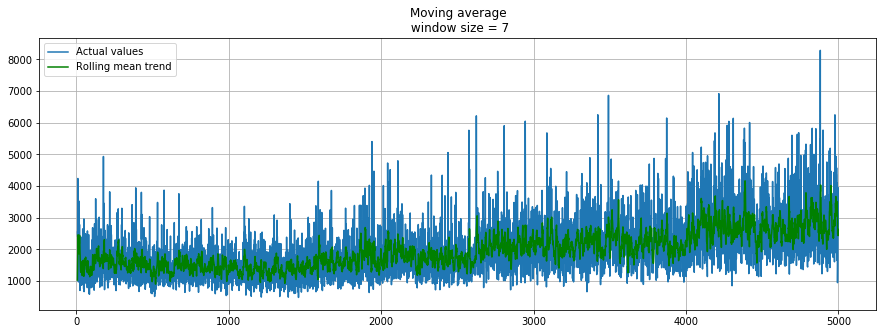

In [53]:
plotMovingAverage(df['likes'][:5000], 7)

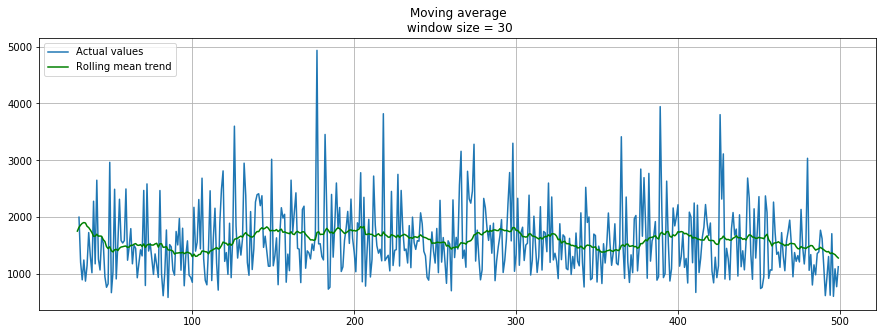

In [55]:
plotMovingAverage(df['likes'][:500], 30)

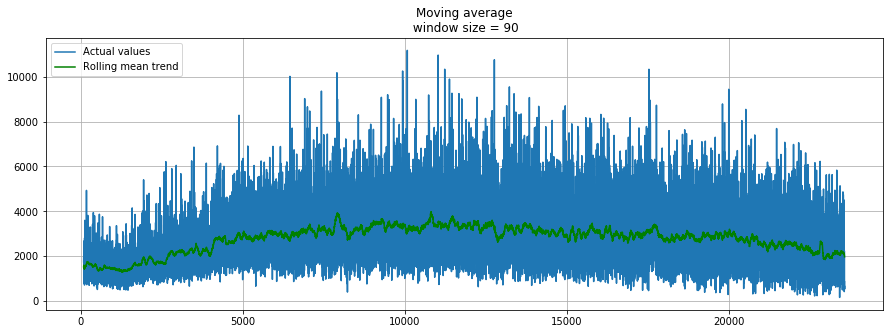

In [49]:
plotMovingAverage(df['likes'], 90)

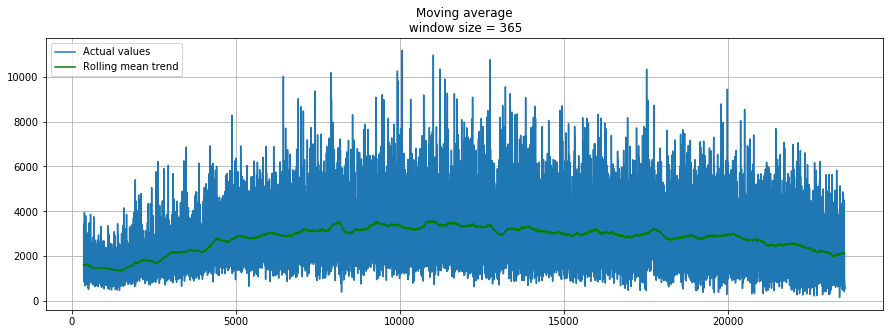

In [50]:
plotMovingAverage(df['likes'], 365)

In [ ]:
def weighted_average(series, weights):
    result = 0.0
    weights.reverse()
    for n in range(len(weights)):
        result += series[-n-1] * weights[n]
    return result